# Made by Group Members:
# 1. Ehtesham Ashraf (MTEG230090)

# 2. Abdul Qadir (MTEG230077)

# **Exploratory Data Analysis on 'data_ott.csv'**

Reading the dataset from .csv file as pandas dataframe

In [1]:
import pandas as pd
df1 = pd.read_csv('D:\Jupyter Notebooks\data_ott.csv')
df1.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Finding no. of missing values in each column

In [2]:
for col in df1:
    print(f"No. of Missing Values in {col} = {df1[col].isna().sum()}")

No. of Missing Values in show_id = 0
No. of Missing Values in type = 0
No. of Missing Values in title = 0
No. of Missing Values in director = 2634
No. of Missing Values in cast = 825
No. of Missing Values in country = 831
No. of Missing Values in date_added = 10
No. of Missing Values in release_year = 0
No. of Missing Values in rating = 4
No. of Missing Values in duration = 3
No. of Missing Values in listed_in = 0
No. of Missing Values in description = 0


Observations:


*   Half of the columns (6) have no missing values.
*   Most of the missing values are in the 'director', 'cast' and 'country' column


---





### **Univariate Exploratory Data Analysis**

The columns 'director', 'cast', 'country' and 'listed_in' have several elements in one row seperated by commas.

Hence, a **function 'FreqCounter'** is defined to first seperate the strings in each row by comma using split() and concatenate all of them in a single list. Then frequency of each element is counted and stored as a dictionary in 'freq'. This dictionary is sorted in decreasing order, converted to a dataframe and then returned. This function is called to perform Univariate EDA on those 4 columns.

In [3]:
def FreqCounter(li,col1):
    li2 = []
    for l in li:
        li2 = li2 + l.split(",")
    li2 = [l.strip() for l in li2 if l!='']
    freq = {}
    for l in li2:
        if l in freq:
            freq[l] += 1
        else:
            freq[l] = 1
    freq = dict(sorted(freq.items(),key = lambda x: x[1],reverse=True))
    lidf = pd.DataFrame({col1:freq.keys(), 'No. of Titles':freq.values()})
    lidf.index+=1
    return lidf

**Univariate EDA on 'director' column**

As most of the rows in this column contain names of multiple directors seperated by commas, FreqCounter function is called to count which Top 10 directors have directed highest no. of titles. Also, the number of unique directors in the dataset is found to be 4,993.

In [4]:
drc = list(df1.director.dropna())
drcf = FreqCounter(drc,'Director')
print("No. of Unique Director = ",len(drcf))
drcf.head(10)

No. of Unique Director =  4993


,Director,No. of Titles
1,Rajiv Chilaka,22
2,Jan Suter,21
3,Raúl Campos,19
4,Suhas Kadav,16
5,Marcus Raboy,16
6,Jay Karas,15
7,Cathy Garcia-Molina,13
8,Youssef Chahine,12
9,Martin Scorsese,12
10,Jay Chapman,12


**Observation:**
Rajiv Chilaka has directed the most no. of titles from the dataset.

**Univariate EDA on 'cast' column**

Same frequency analysis is done on 'cast' column and the Top 20 actors who have appeared in highest no. of titles is shown.

In [5]:
act = list(df1.cast.dropna())
actf = FreqCounter(act,'Actor')
print("No. of Unique Actors = ",len(actf))
actf.head(20)

No. of Unique Actors =  36439


,Actor,No. of Titles
1,Anupam Kher,43
2,Shah Rukh Khan,35
3,Julie Tejwani,33
4,Naseeruddin Shah,32
5,Takahiro Sakurai,32
6,Rupa Bhimani,31
7,Akshay Kumar,30
8,Om Puri,30
9,Yuki Kaji,29
10,Amitabh Bachchan,28


**Observation:**

1. Anupam Kher has acted in the most no. of titles from the dataset.
2. Most of the actors in the Top 20 are Indian, implying that the dataset may have been created by an Indian.
3. No. of unique actors i.e., 36439 is much higher than the no. of unique directors (4,993) thereby aligning with the fact that no. of actors in a movie/TV show is generally significantly higher than the no. of directors in it.

**Univariate EDA on 'country' column**

Same frequency analysis is done on 'country' column and the Top 10 countries having highest no. of titles in the dataset are shown.

In [6]:
cn = list(df1.country.dropna().unique())
cn2 = []
for c in cn:
    cn2 = cn2 + c.split(",")
cn2 = [c.strip() for c in cn2 if c!='']
Uniq_Countries = set(cn2)
uc = sorted(Uniq_Countries)
print(uc)
print("No. of Unique Countries = ",len(Uniq_Countries))

['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bangladesh', 'Belarus', 'Belgium', 'Bermuda', 'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands', 'Chile', 'China', 'Colombia', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Dominican Republic', 'East Germany', 'Ecuador', 'Egypt', 'Ethiopia', 'Finland', 'France', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kuwait', 'Latvia', 'Lebanon', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malawi', 'Malaysia', 'Malta', 'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Morocco', 'Mozambique', 'Namibia', 'Nepal', 'Netherlands', 'New Zealand', 'Nicaragua', 'Nigeria', 'Norway', 'Pakistan', 'Palestine', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland

In [7]:
cn = list(df1.country.dropna())
cf = FreqCounter(cn,'Countries')
cf.head(10)

,Countries,No. of Titles
1,United States,3690
2,India,1046
3,United Kingdom,806
4,Canada,445
5,France,393
6,Japan,318
7,Spain,232
8,South Korea,231
9,Germany,226
10,Mexico,169


**Observations:**
1. No. of unique countries in the dataset is found to be 122, which means out of the total of 195 countries in the world, the dataset does not contain even a single title from the 73 remaining countries (assuming all 73 of them have produced atleast 1 movie or TV show till 2021)

**Univariate EDA on 'listed_in' column**

Same frequency analysis is done on 'listed_in' column, only this time, no. of lists with unique names were found to be just 42 and thus could be plotted as a bar plot.

In [8]:
li = list(df1.listed_in.dropna().unique())
li2 = []
for l in li:
    li2 = li2 + l.split(",")
li2 = [l.strip() for l in li2 if l!='']
Uniq_Lists = sorted(set(li2))
print(Uniq_Lists)
print("No. of Unique Lists = ",len(Uniq_Lists))

['Action & Adventure', 'Anime Features', 'Anime Series', 'British TV Shows', 'Children & Family Movies', 'Classic & Cult TV', 'Classic Movies', 'Comedies', 'Crime TV Shows', 'Cult Movies', 'Documentaries', 'Docuseries', 'Dramas', 'Faith & Spirituality', 'Horror Movies', 'Independent Movies', 'International Movies', 'International TV Shows', "Kids' TV", 'Korean TV Shows', 'LGBTQ Movies', 'Movies', 'Music & Musicals', 'Reality TV', 'Romantic Movies', 'Romantic TV Shows', 'Sci-Fi & Fantasy', 'Science & Nature TV', 'Spanish-Language TV Shows', 'Sports Movies', 'Stand-Up Comedy', 'Stand-Up Comedy & Talk Shows', 'TV Action & Adventure', 'TV Comedies', 'TV Dramas', 'TV Horror', 'TV Mysteries', 'TV Sci-Fi & Fantasy', 'TV Shows', 'TV Thrillers', 'Teen TV Shows', 'Thrillers']
No. of Unique Lists =  42


<Axes: title={'center': 'No. of Titles from each list'}, xlabel='List'>

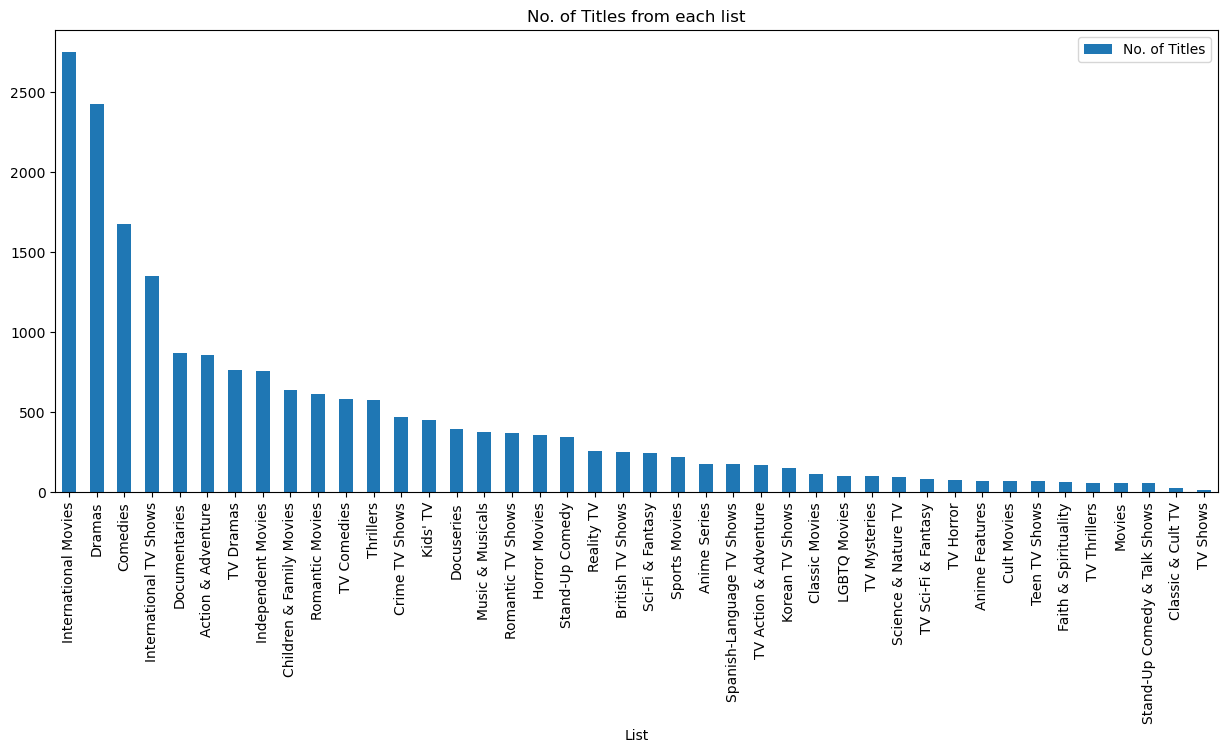

In [9]:
li = list(df1.listed_in)
lif = FreqCounter(li,'List')
lif.plot(x=0, kind = 'bar', figsize = (15,6), title = "No. of Titles from each list")

**Observation :**

As seen from the bar plot, the lists 'International Movies', 'Dramas', 'Comedies' and 'International TV Shows' have a significantly larger portion of the titles from the dataset.

**Univariate EDA on 'type' column**

The frequency of strings in the column 'type' were counted and displayed as a pie chart.

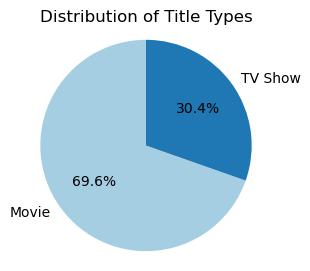

In [10]:
import matplotlib.pyplot as plt
title_counts = df1['type'].value_counts()
labels = title_counts.index
sizes = title_counts.values
plt.figure(figsize=(3, 3))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of Title Types')
plt.axis('equal')
plt.show()

**Observations:**
1. It contains only 2 unique types i.e., 'Movie' and 'TV-Show'.
2. Almost 70% of the titles in the dataset are Movies.

**Univariate EDA on 'release_year' column**

Frequency analysis is done to find out the no. of titles released in each year. A bar plot shows the frequency analysis.

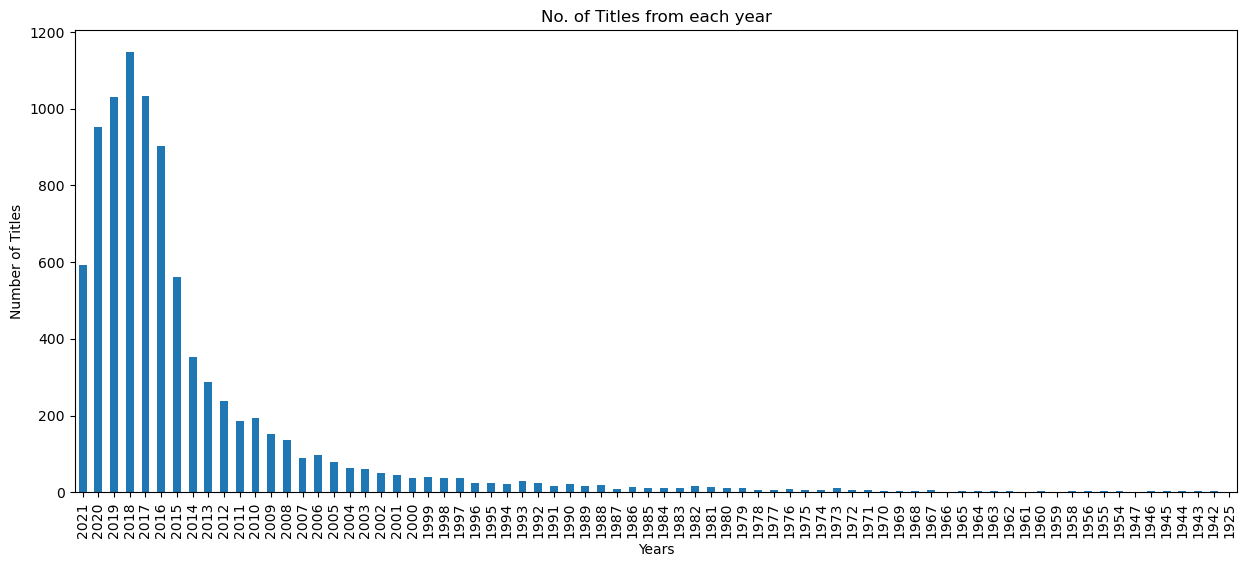

In [11]:
a = pd.DataFrame(df1.release_year.value_counts())
a = a.sort_index(ascending=False)
a.plot(kind = 'bar',figsize = (15,6), title = "No. of Titles from each year", legend=False)
ax = plt.gca()
ax.set_xlabel("Years")
ax.set_ylabel("Number of Titles")
plt.show()

**Observation:**
As seen from the bar plot, the no. of titles released in each year as time goes by increases like an exponential trend, reaching the highest in the year 2018 and then again dropping down to almost half as much released in 2018, in 2021.

**Univariate EDA on 'ratings' column**

Firstly, the unique values in the column are printed. Its observed that among the correct rating strings allotted to movies and TV shows, there are 3 values corresponding to the movie's length

In [12]:
df1.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

**Observation:**

Among the correct rating strings allotted to movies and TV shows, there are 3 values i.e., '74 min', '84 min', '66 min' corresponding to the movie's length. These should not be in this column but in the 'duration' column in the same row.

Hence, a loop is run through the dataframe to identify these values, copy them to 'duration' column and replace them by NaN.

In [13]:
for index, row in df1.iterrows():
    rating = row['rating']
    duration = row['duration']
    if isinstance(rating, str) and 'min' in rating:
        df1.at[index, 'duration'] = rating
        df1.at[index, 'rating'] = float('nan')

The frequencies of occurence of different ratings are calculated and plotted as bar plot.

Text(0, 0.5, 'Number of Titles')

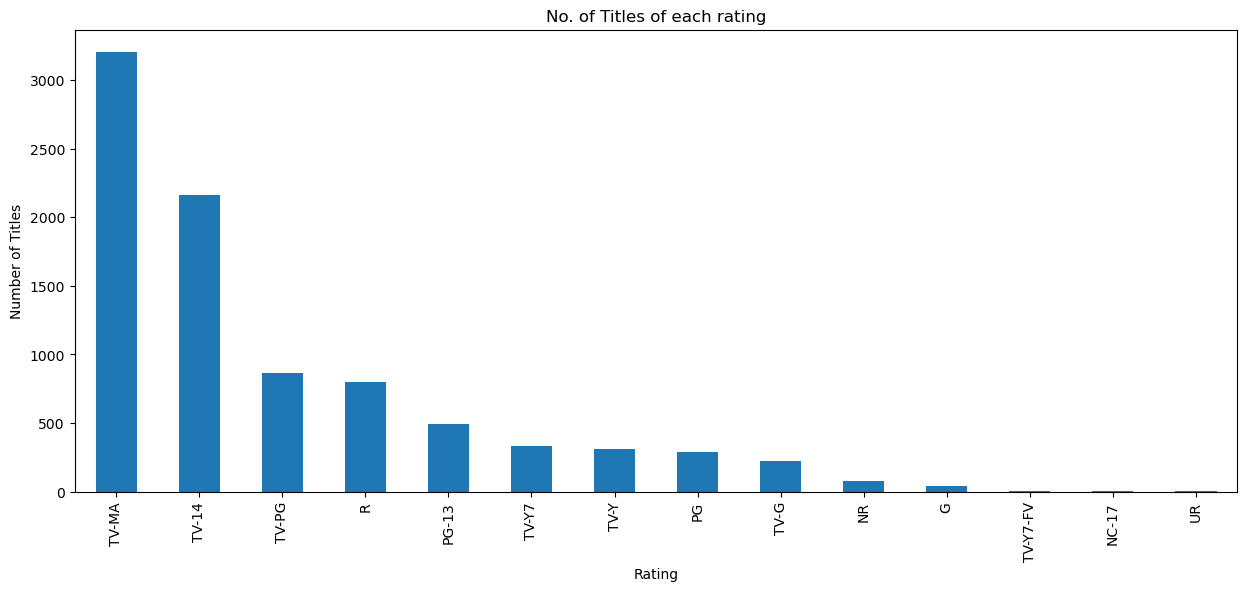

In [14]:
rf = pd.DataFrame(df1.rating.value_counts())
rf = rf.sort_values(by='rating', ascending=False)
rf.plot(kind = 'bar',figsize = (15,6), title = "No. of Titles of each rating", legend=False)
ax = plt.gca()
ax.set_xlabel("Rating")
ax.set_ylabel("Number of Titles")

Out of all ratings, only 3 correspond to adult rated movies or TV shows. These are TV-MA, R and NC-17. So, no. of family friendly titles would be the remaining titles.

**Observation:**
Their percentage is calculated to be 54.44 % i.e, there are almost equal no. of family-friendly titles and adult-rated titles.

In [15]:
cc = rf.loc['TV-MA','rating'] + rf.loc['R','rating'] + rf.loc['NC-17','rating']
print("% of Family Friendly Titles = ", round((1-cc/df1.rating.count())*100,2), "%")

% of Family Friendly Titles =  54.44 %


**Univariate EDA on 'duration' column**

In the 'duration' column, duration of titles whose 'type' is 'Movie' is written in minutes while duration of titles whose 'type' is 'TV Show' is written in no. of seasons. Hence, these are filtered accordingly, stored in different lists and box plots are plotted for each of the title types.

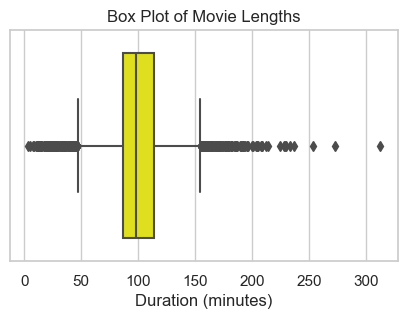

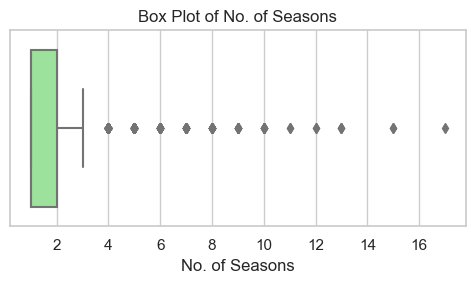

In [16]:
import seaborn as sns

sns.set(style="whitegrid")
mlen = list(df1[df1['duration'].str.contains('min', na=False)]['duration'].str.extract(r'(\d+)').astype(float)[0])
plt.figure(figsize=(5, 3))
sns.boxplot(x=mlen,color='yellow')
plt.title('Box Plot of Movie Lengths')
plt.xlabel('Duration (minutes)')

tvs = list(df1[df1['duration'].str.contains('Season', na=False)]['duration'].str.extract(r'(\d+)').astype(float)[0])
plt.figure(figsize=(5, 3))
sns.boxplot(x=tvs,color='lightgreen')
plt.title('Box Plot of No. of Seasons')
plt.xlabel('No. of Seasons')
plt.tight_layout()
plt.show()

The statistical summary of those 2 box plots are shown below:

In [17]:
pd.DataFrame(mlen).describe()

,0
count,6131.000000
mean,99.564998
std,28.289504
min,3.000000
25%,87.000000
50%,98.000000
75%,114.000000
max,312.000000


**Observations:**
1. The mean movie length is 99.56 minutes.
2. The standard deviation (std) of movie lengths is 28.29 minutes. Hence the coefficient of variation (CoV) in % would be 28.29/99.56 * 100 = 28.4% which means there is quite high dispersion of movie lengths in this data.
3. The minimum movie length is 3 minutes, and the maximum is 312 minutes. The presence of both very short and very long movies suggests diversity in the dataset.
4. Most movies are around 87 to 114 minutes long.

In [18]:
pd.DataFrame(tvs).describe()

,0
count,2676.000000
mean,1.764948
std,1.582752
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,17.000000


**Observations:**
1. The mean no. of seasons in the TV Shows is 1.765.
2. The standard deviation (std) of no. of seasons is 1.583. It suggests that most TV shows have a number of seasons that deviate from the mean by a relatively small amount.
3. The data distribution is skewed towards shows with fewer seasons. This is evident from the fact that both the median (50th percentile) and the 75th percentile are equal to 1. This suggests that a significant portion of TV shows in the dataset have only 1 season.
4. The range of the number of seasons is from a minimum of 1 season to a maximum of 17 seasons. Since most of the TV Shows in the dataset have 1 or 2 seasons only, this means that only a few TV Shows that have exceptionally high no. of seasons ranging from 4 to 17 as seen from the box plot

**Univariate EDA on 'description' column**

Since, the 'description' column contains long sentences, all the descriptions are joined together in one string and a wordcloud graph is plotted to show which words occur most frequently among the plot descriptions of all titles.

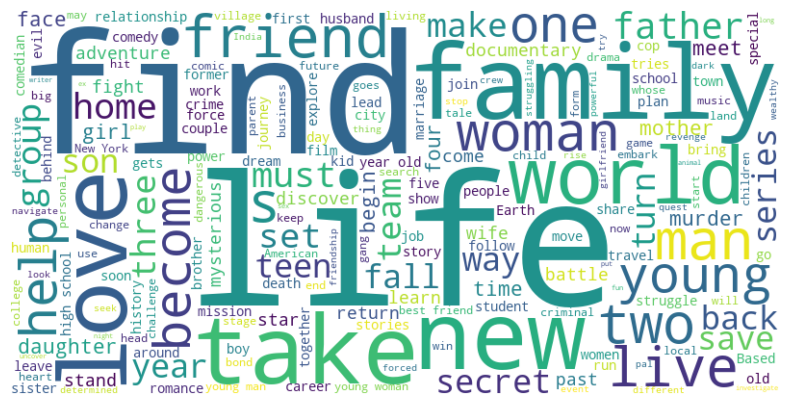

In [19]:
from wordcloud import WordCloud
all_desc = ' '.join(df1['description'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_desc)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**Observation:**
1. The word 'life' occured the highest no. of times in the plot descriptions of the titles.
2. Other frequent occuring words are 'find', 'family', 'take', 'friend', 'world','love', 'new', 'woman', 'man', etc.

**Univariate EDA on 'title' column**

Another Wordcloud is plotted for the 'title' column as it contains short to medium length strings to show which words occur most frequently among names of all titles.

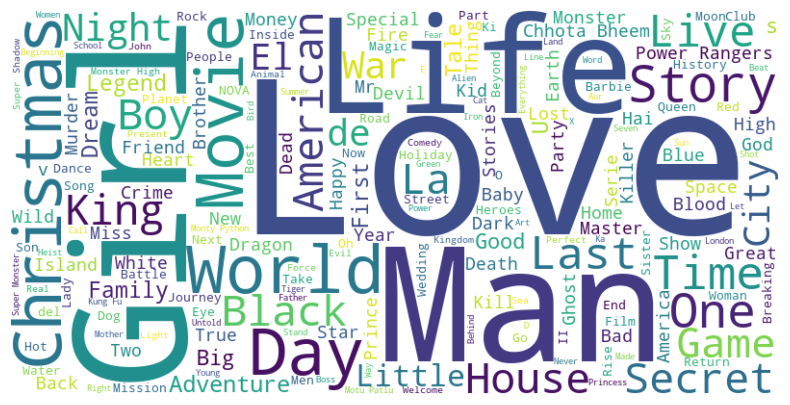

In [20]:
all_desc2 = ' '.join(df1['title'].dropna())
wordcloud2 = WordCloud(width=800, height=400, background_color='white').generate(all_desc2)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis('off')
plt.show()

**Observation:**
1. The word 'Love' occured the highest no. of times in the plot descriptions of the titles.
2. Other frequent occuring words are 'Girl', 'Man', 'Life', 'World','Christmas', 'Story', 'Movie', 'Last', 'One', etc.



---

### **Multivariate Exploratory Data Analysis**

**Multivariate EDA on 'type', 'country' & 'duration' columns**

The 3 columns are analysed to find out the countries which have the highest average Movie length. The list of unique countries computed earlier was used here. Average length is calculated for all the titles whose 'type' is 'Movie' and whose 'Country' cell contains the name of a certain country.

In [21]:
ndf = df1[['type','country','duration']].copy()
ndf = ndf.dropna()
ndf = ndf[ndf['type']=='Movie']
avg = []
cn = []
for u in uc:
    dur = []
    for i in range(len(ndf)):
        if u in ndf.iloc[i,1]:
            dur.append(int(ndf.iloc[i,2].split()[0]))
    cn.append(len(dur))
    if len(dur) != 0:
        avg.append(round(sum(dur)/len(dur),2))
    else:
        avg.append(0)

In [22]:
lavg = pd.DataFrame({'Countries':uc,'Avg Movie Length':avg,'No. of Movies':cn})
lavg = lavg.sort_values(by='Avg Movie Length', ascending=False, ignore_index=True)
lavg.index +=1
lavg.head(10)

,Countries,Avg Movie Length,No. of Movies
1,Liechtenstein,200.00,1
2,Montenegro,157.00,1
3,Soviet Union,156.67,3
4,Bahamas,145.00,1
5,Cameroon,143.00,1
6,Morocco,137.33,6
7,Malta,135.50,2
8,India,125.91,962
9,Ethiopia,125.00,1
10,Burkina Faso,125.00,1


**Observations:**


*   Liechtenstein is found to have the highest average movie length but only 1 movie was found from that country. Hence, in general, it may not be the country with highest average movie length.
*   Same is observed for top 7 positions i.e., all of them have high average movie length but very small no. of movies.
*   However, at position 8 lies India which has its average length calculated from significantly higher no. of titles which means its most likely that the general average length of movies in India is around 126 minutes

When the dataframe is filtered by removing all countries with less than 100 movies, the top countries with enough no. of movies can be seen now. Egypt and China join India in the Top 3.

In [23]:
lavg = lavg[lavg['No. of Movies']>100]
lavg.head(10)

,Countries,Avg Movie Length,No. of Movies
8,India,125.91,962
30,Egypt,108.33,102
47,China,104.46,114
51,Germany,103.17,185
57,Spain,101.10,171
60,France,100.97,303
67,Japan,98.85,119
68,United Kingdom,98.76,534
91,United States,93.73,2752
96,Canada,91.15,319


The 3 columns are again analysed similarly but this time considering only the titles which are TV-shows i.e, whose 'type' column has 'TV-Show' and finding out which countries produce TV-Shows with highest average no. of seasons.

In [24]:
ntv = df1[['type','country','duration']].copy()
ntv = ntv.dropna()
ntv = ntv[ntv['type']=='TV Show']
avg = []
cn = []
for u in uc:
    dur = []
    for i in range(len(ntv)):
        if u in ntv.iloc[i,1]:
            dur.append(int(ntv.iloc[i,2].split()[0]))
    cn.append(len(dur))
    if len(dur) != 0:
        avg.append(round(sum(dur)/len(dur),2))
    else:
        avg.append(0)

In [25]:
savg = pd.DataFrame({'Countries':uc,'Avg No. of Seasons':avg,'No. of TV Shows':cn})
savg = savg.sort_values(by='Avg No. of Seasons', ascending=False, ignore_index=True)
savg.index +=1
savg.head(10)

,Countries,Avg No. of Seasons,No. of TV Shows
1,Malta,4.00,1
2,United Arab Emirates,3.00,1
3,Hungary,3.00,1
4,Canada,2.82,126
5,Ireland,2.57,14
6,Denmark,2.43,14
7,United States,2.31,938
8,Finland,2.00,4
9,Saudi Arabia,2.00,4
10,Croatia,2.00,1


**Observations:**

*   Malta is found to have highest average no. of seasons, but again its for only 1 TV-Show having 4 seasons which means it may not be a general figure for that country.
*   Only 2 countries in the top 10 i.e., Canada and United States have significantly higher amount of TV-Shows than the rest.


**Multivariate EDA on 'type', 'release_year' & 'duration' columns**

The 3 columns are analysed to find out the trend in the average lengths of movies over time i.e., from as early as 1942 to 2021. Only those titles were considered whose 'type' column has 'Movie'.

In [26]:
ndf2 = df1[['type','release_year','duration']].copy()
ndf2 = ndf2.dropna()
ndf2 = ndf2[ndf2['type']=='Movie']
avg2 = []
cn2 = []
yr = range(1942,2022)
for y in yr:
    dur2 = []
    for i in range(len(ndf2)):
        if str(y) in str(ndf2.iloc[i,1]):
            dur2.append(int(ndf2.iloc[i,2].split()[0]))
    cn2.append(len(dur2))
    if len(dur2) != 0:
        avg2.append(round(sum(dur2)/len(dur2),2))
    else:
        avg2.append(0)

In [27]:
yavg = pd.DataFrame({'release_year':yr,'Avg Movie Length':avg2,'No. of Movies':cn2})
yavg2 = yavg.sort_values(by='Avg Movie Length', ascending=False, ignore_index=True)
yavg2.index +=1
yavg2.head(10)

,release_year,Avg Movie Length,No. of Movies
1,1964,200.50,2
2,1963,194.00,1
3,1962,167.00,3
4,1961,156.00,1
5,1965,151.50,2
6,1968,149.67,3
7,1960,143.50,4
8,1959,143.00,1
9,1971,142.80,5
10,1969,140.00,2


**Observations:**
1. The year 1964 has the highest average movie length at 200.5 minutes but only considering 2 movies.
2. Most of the years in Top 10 belong to 1960's

A graph is plotted with x-axis = year and y-axis = Avg Movie Length to show the trend of movie length over time from 1942 to 2021. The average length is set to NaN for the years from which no movies are present in the dataset.

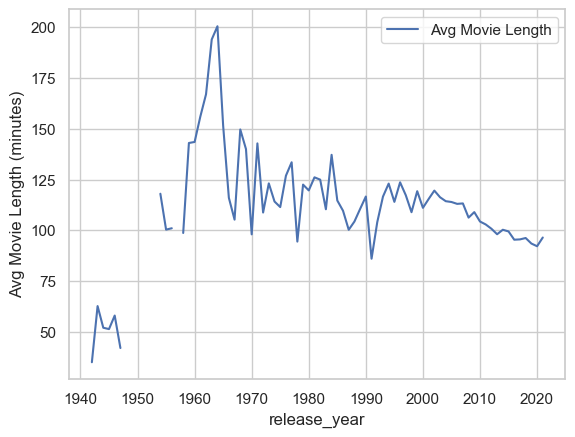

In [28]:
import numpy as np
yr2 = []
for y in yavg['Avg Movie Length']:
    if y == 0:
        yr2.append(np.nan)
    else:
        yr2.append(y)
yavg['Avg Movie Length'] = yr2
yavg.plot(x="release_year", y="Avg Movie Length")
plt.ylabel("Avg Movie Length (minutes)")
plt.show()

**Observations:**
1. The graph shows a decreasing trend in average movie length from 1964 to 2021.
2. The movies in the 1940's had very short length (around & less than 1 hr).
3. The average movie length varied largely from 1964 till around 1995 when it just started declining at an almost constant rate. 

**Multivariate EDA on 'description' & 'title' columns**

Firstly, it is checked if the 'description' column has any duplicate values (meaning same title repeated more than once). Its found that it has 59 duplicate values.

In [29]:
column_duplicates = df1['description'].duplicated(keep=False)
num_duplicates = column_duplicates.sum()
print(f"No. of duplicate values in 'description': {num_duplicates}")

No. of duplicate values in 'description': 59


In [30]:
dup_descriptions = df1[df1['description'].duplicated(keep=False)]['description']
dupdesc = df1[df1['description'].isin(dup_descriptions)][['title', 'description']]
dupdesc = dupdesc.sort_values(by='description')
dupdesc.reset_index(drop=True, inplace=True)
dupdesc.index +=1
dupdesc

,title,description
1,Tughlaq Durbar,A budding politician has devious plans to rise...
2,Tughlaq Durbar (Telugu),A budding politician has devious plans to rise...
3,Hum Saath-Saath Hain,A scheming matriarch plots to cut off her disa...
4,Together For Eternity,A scheming matriarch plots to cut off her disa...
5,Oh! Baby (Malayalam),A surly septuagenarian gets another chance at ...
6,Oh! Baby,A surly septuagenarian gets another chance at ...
7,Oh! Baby (Tamil),A surly septuagenarian gets another chance at ...
8,Solo: A Star Wars Story,A young Han Solo tries to settle an old score ...
9,Solo: A Star Wars Story (Spanish Version),A young Han Solo tries to settle an old score ...
10,22-Jul,"After devastating terror attacks in Norway, a ..."


Now, the duplicate descriptions with their corresponding titles are filtered and stored in another dataframe to show which titles have duplicated descriptions.

**Observations:**


*   The titles which represent the same movie or TV show but in different languages i.e, Tamil, Telugu, Malayalam, Spanish, etc. have exact same descriptions, because obviously its the same content in just a different language.
*   Not all the titles are of this type. Some of them such as 22**-**Jul & 22 Jul**y**, Andha**gh**aaram & Andha**k**aaram, Naruto Shippuden : Blood Prison & Naruto Shippuden **the Movie**: Blood Prison, etc are really duplicate values since they represent the same movie or TV show with just typographical errors or extra words.

